> Histogram equalization

# 강의영상

<https://youtube.com/playlist?list=PLQqh36zP38-zbK5TSpioGW87b8PDRXS5M>

# 참고자료 

`-` 넘파이 문법이 약하다면? (reshape, concatenate, stack) 

1. [reshape](https://guebin.github.io/IP2022/2022/04/06/(6주차)-4월6일.html): 링크의 넘파이공부 2단계 reshape 참고 

2. [concatenate, stack](https://guebin.github.io/IP2022/2022/04/11/(6주차)-4월11일.html): 링크의 넘파이공부 4단계 참고 

`-` [주피터에서 `!`로 시작하는 명령의 기원, 혹은 원리를 알고싶다면?](https://guebin.github.io/IP2022/2022/03/28/(4주차)-3월28일.html): 링크의 3세대 프로그래머의 삶까지 살펴볼 것 

`-` [import, from ... import ... 등 모듈을 임포트하는 방식이 낯설다면?]( https://guebin.github.io/IP2022/2022/04/03/(5주차)-4월2일.html)

## 오늘 배울 내용? 

`-` 히스토그램의 활용: 정규분포인지 판단 <- 지난시간 내용 

`-` 히스토그램의 활용2: 이미지 보정! [히스토그램 이퀄라이제이션](https://en.wikipedia.org/wiki/Histogram_equalization) <-- 오늘소개할 내용 

# imports

```
!pip install opencv-python
```

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## 이미지자료 다운로드

In [2]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')

--2022-09-14 17:57:58--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg.5’

Unequalized_Hawkes_ 100%[===================>] 108.30K   505KB/s    in 0.2s    

2022-09-14 17:57:59 (505 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg.5’ saved [110895/110895]



In [3]:
img.shape

(683, 1024, 3)

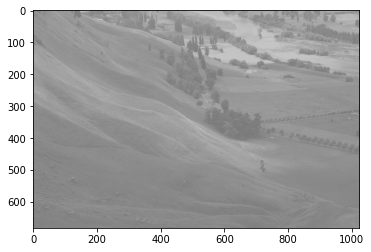

In [4]:
plt.imshow(img)

## 이미지자료의 이해 

## 비밀1: 이미지는 사실 숫자들의 집합이었음. 

`-` 예시1

In [5]:
_img1 = np.array([0,30,90,120,150,180,210,240,255]).reshape(3,3)
_img1

array([[  0,  30,  90],
       [120, 150, 180],
       [210, 240, 255]])

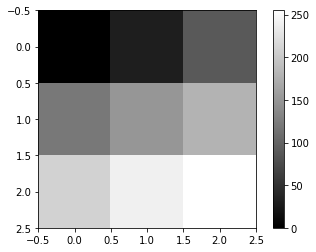

In [6]:
plt.imshow(_img1,cmap='gray')
plt.colorbar()

`-` 예시2 

In [7]:
_img2 = np.array([0,20,40,60,80,100,120,140,160]).reshape(3,3)
_img2

array([[  0,  20,  40],
       [ 60,  80, 100],
       [120, 140, 160]])

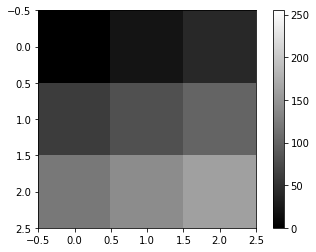

In [8]:
plt.imshow(_img2,cmap='gray',vmin=0,vmax=255)
plt.colorbar()

`-` 예시3

In [9]:
_img3 = np.concatenate([_img1,_img2],axis=1)
_img3

array([[  0,  30,  90,   0,  20,  40],
       [120, 150, 180,  60,  80, 100],
       [210, 240, 255, 120, 140, 160]])

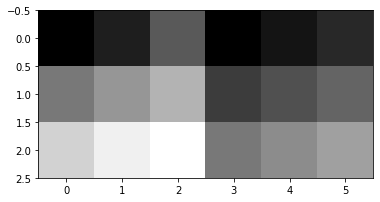

In [10]:
plt.imshow(_img3,cmap='gray')

## 비밀2: 칼라이미지는 red + green + blue 의 조합으로 표현가능 (다른방식도 가능)

`-` 예시1

In [11]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 

In [12]:
r[:3,:3,0] = 255   
g[:3,2:,1] = 255
b[2:,:,2] = 255 

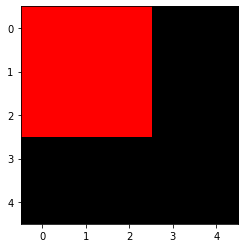

In [13]:
plt.imshow(r)

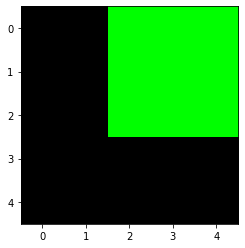

In [14]:
plt.imshow(g)

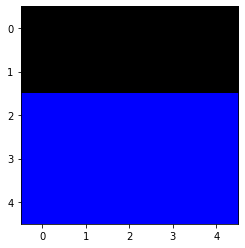

In [15]:
plt.imshow(b)

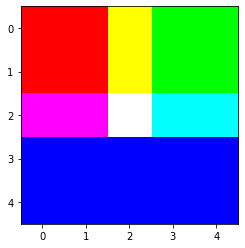

In [16]:
plt.imshow(r+g+b)

`-` 예시2: R,G,B를 같은 비율로 섞으면 무채색이 된다.

In [17]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 
r[:3,:3,0] = 80   
g[:3,2:,1] = 80
b[2:,:,2] = 80 

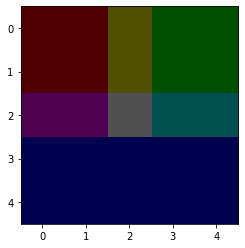

In [18]:
plt.imshow(r+g+b)

`-` 예시3: 우리가 관심있는 자료 

In [19]:
img.shape

(683, 1024, 3)

In [20]:
img_red = img * 0 
img_green = img * 0 
img_blue = img * 0 

In [21]:
img_red[...,0] = img[...,0] 
img_green[...,1] = img[...,1] 
img_blue[...,2] = img[...,2] 

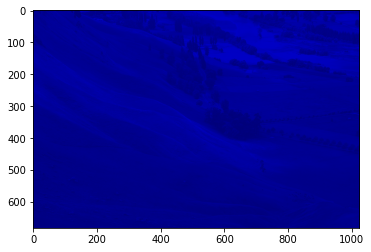

In [22]:
plt.imshow(img_blue)

# 히스토그램 이퀄라이제이션

`-` 이미지를 rgb로 각각 분리하고 각 색깔들의 히스토그램을 그려보자. 

(array([  3691.,  56282., 235628., 170392., 120545.,  60511.,  22052.,
         14354.,  15246.,    691.]),
 array([114. , 123.4, 132.8, 142.2, 151.6, 161. , 170.4, 179.8, 189.2,
        198.6, 208. ]),
 <BarContainer object of 10 artists>)

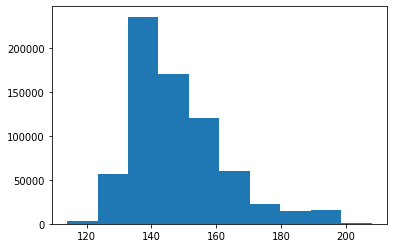

In [23]:
plt.hist(img[:,:,0].reshape(-1))

- 히스토그램 그림1

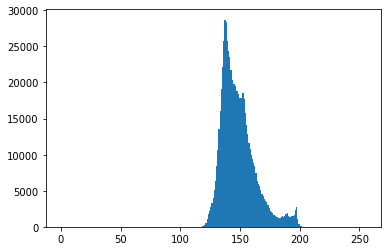

In [24]:
_fig = plt.hist(img[:,:,0].reshape(-1),bins=255, range=[0,255])

- 히스토그램 그림2
- 120-200 사이에 값이 몰려있음 
- 그런데 컴퓨터가 표현가능한 색은 0~255.. 
- 만약에 120-200까지의 분포된 모양은 그대로 유지하면서 range를 0-255 까지 늘린다면? 

`-` 분포의 모양은 대략적으로 유지하면서 값을 퍼트리자!

In [25]:
img2_red = cv2.equalizeHist(img[...,0])

(array([59973., 57426., 82721., 73706., 61999., 76539., 72114., 72030.,
        72601., 70283.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

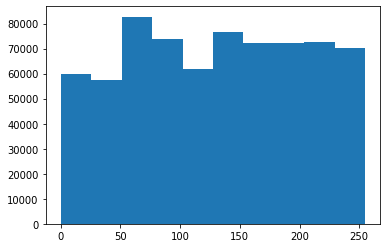

In [26]:
plt.hist(img2_red.reshape(-1))

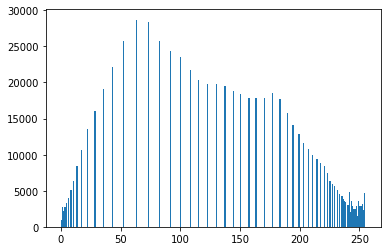

In [27]:
_fig=plt.hist(img2_red.reshape(-1),bins=255,range=(0,255))

`-` red말고 다른채널에도 이와 같은 변환을 정의한다면? 

In [28]:
img2 = np.stack([img2_red,img2_red,img2_red],axis=-1)

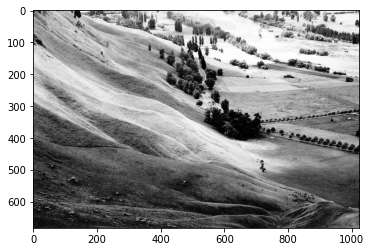

In [29]:
plt.imshow(img2)

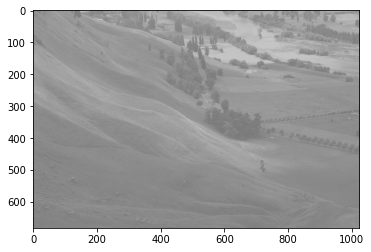

In [30]:
plt.imshow(img)

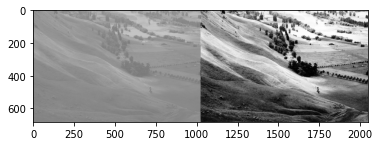

In [31]:
plt.imshow(np.concatenate([img,img2],axis=1))

# 히스토그램 이퀄라이제이션 (흑백버전) 

In [32]:
img_black =  cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)

In [33]:
img_black2 = cv2.equalizeHist(img_black)

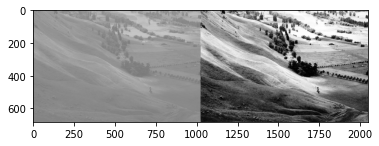

In [34]:
plt.imshow(np.concatenate([img_black,img_black2],axis=1),cmap='gray')

# 숙제 

`-` HE(Histogram Equalization)을 이용하여 아래주소에 저장된 이미지의 명암비를 보존하라

<https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/hw_img.png>